# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Overview

I am using the TMDb movie data set to complete this project.
This data set contains information of about 10,000 movies collected from The Movie Database (TMDb), including ratings, revenue, cast, runtime, directors and genres.  

#### Questions to be analyzed from this data set:

>1. What movies have the highest revenue?
2. What movies have the highest budget?
3. How do revenues correlate with budgets?
4. What genres have the highest and lowest average rating?
5. What directors have the highest average rating of movies?
6. On average, are movies rated higher over the last 20 years than before the last 20 years?
7. What is the average runtime of all movies? How has the average runtime for movies changed over the years?
8. What is the average runtime for the highest rated movies?  How do they compare with other movies that were rated lower?
9. What is the average runtime for the most profitable movies?  How do they compare with other movies that were less profitable?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Loading Data

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


### Number of rows and columns

In [3]:
df.shape

(10866, 21)

This data set contains 10,866 rows and 21 columns

### Drop columns that are not necessary for data set analysis

In [4]:
df.drop(['id', 'imdb_id', 'popularity', 'homepage', 'tagline', 'cast', 'overview', 'production_companies', 'vote_count', 'budget_adj', 'revenue_adj', 'keywords'], 
        axis = 1, inplace = True)
df.head(2)

,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015


Dropped a number of columns that are not relevant to the data set analysis to answer the proposed questions

### Check data types of columns

In [5]:
df.dtypes

budget              int64
revenue             int64
original_title     object
director           object
runtime             int64
genres             object
release_date       object
vote_average      float64
release_year        int64
dtype: object

The data type for release date is an 'object' or 'string' and would be more useful if converted to date time for analysis.

### Check data for NULL value

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 764.1+ KB


There are 2 columns (director and genres) with NULL values.  These NULL values will need to be removed when answering specific questions dealing with these columns.

### Check for duplicate rows

In [7]:
sum(df.duplicated())

1

There appears to be 1 duplicate row that will need to be removed.

## Look at summary statistics for columns with numerical values

In [8]:
df.describe()

,budget,revenue,runtime,vote_average,release_year
count,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000
mean,1.462570e+07,3.982332e+07,102.070863,5.974922,2001.322658
std,3.091321e+07,1.170035e+08,31.381405,0.935142,12.812941
min,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000
25%,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000
50%,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000
75%,1.500000e+07,2.400000e+07,111.000000,6.600000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000


It appears as if there are minimum values for both budget and revenue which lead me to believe that these should have been NULL values instead of 0.  When the time is appropriate to explore the data in the budget and revenue columns, these rows will need to be removed from the data set.

## Data Cleaning

### Rearrange order of columns

In [9]:
df = df[['original_title', 'release_date', 'release_year', 'genres', 'director', 'runtime', 'vote_average', 'budget', 'revenue']]
df.head(1)

,original_title,release_date,release_year,genres,director,runtime,vote_average,budget,revenue
0,Jurassic World,6/9/15,2015,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,124,6.5,150000000,1513528810


Rearranged the order of the columns to make it appear more organized

### Change column label

In [10]:
df.rename(columns ={'original_title' : 'title'}, inplace = True)
df.head(1)

,title,release_date,release_year,genres,director,runtime,vote_average,budget,revenue
0,Jurassic World,6/9/15,2015,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,124,6.5,150000000,1513528810


### Change data type of release_date from object to date

In [11]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes

title                   object
release_date    datetime64[ns]
release_year             int64
genres                  object
director                object
runtime                  int64
vote_average           float64
budget                   int64
revenue                  int64
dtype: object

### Delete any duplicate rows

In [12]:
df.drop_duplicates(inplace = True)
sum(df.duplicated())

0

Dropped any duplicate rows.  In this case there was only 1 duplicate row deleted.  I confirmed that there were no more duplicates remaining.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1. What movies have the highest revenue?

Text(0.5,1,'Top 20 Highest Grossing Movies')

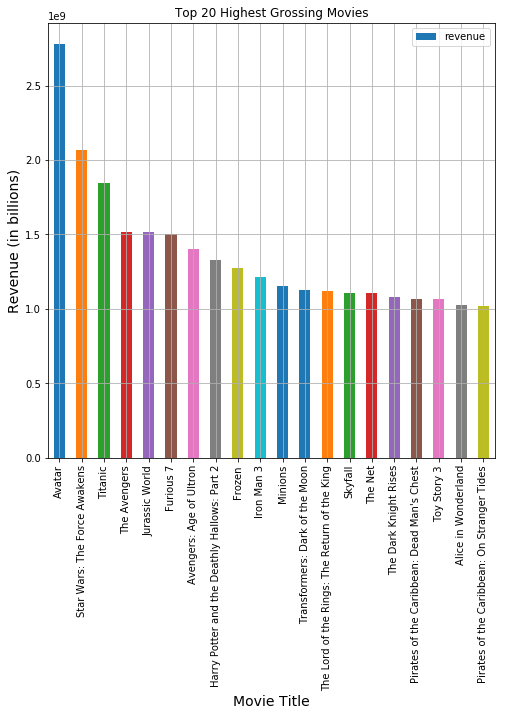

In [13]:
#Sort the rows in descending order by revenue and limiting to the top 20
sort_by_revenue = df.sort_values('revenue', ascending = False)[:20]
top_rev = sort_by_revenue[['title', 'revenue']]

#plot top_rev which shows the top 20 movies with highest revenue
top_rev.plot(kind = 'bar', x = 'title', y = 'revenue', figsize = (8,8), grid = True)
plt.xlabel('Movie Title', fontsize = 14)
plt.ylabel('Revenue (in billions)', fontsize = 14)
plt.title('Top 20 Highest Grossing Movies')

In [14]:
top_rev

,title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810
4,Furious 7,1506249360
14,Avengers: Age of Ultron,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,1327817822
5422,Frozen,1274219009
5425,Iron Man 3,1215439994


These are the top 20 highest grossing movies.  Avater is the highest grossing movie of all time with a total revenue of $2,781,505,847.

### Research Question 2. What movies have the highest budget?

Text(0.5,1,'Top 20 Most Expensive Movies')

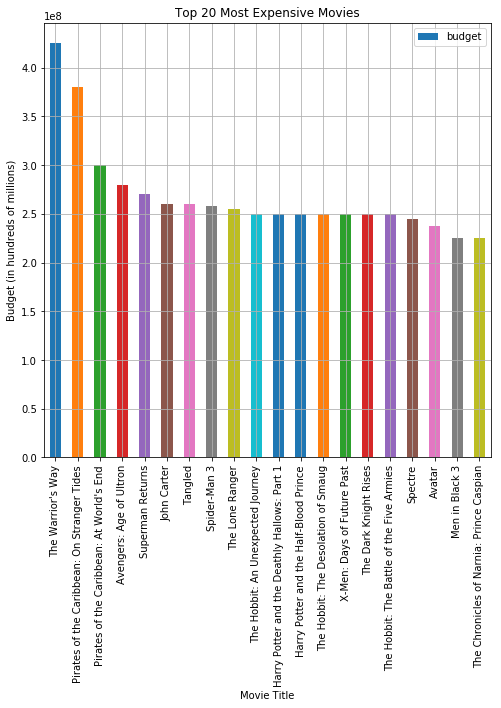

In [15]:
#Sort the rows in descending order by budget and limiting to the top 20
sort_by_budget = df.sort_values('budget', ascending = False)[:20]
top_budget = sort_by_budget[['title','budget']]

#plot top_budget which shows the top 20 movies with highest budget
top_budget.plot(kind = 'bar', x='title', y='budget', figsize = (8,8), grid =1)
plt.xlabel("Movie Title")
plt.ylabel("Budget (in hundreds of millions)")
plt.title("Top 20 Most Expensive Movies")

In [16]:
top_budget

,title,budget
2244,The Warrior's Way,425000000
3375,Pirates of the Caribbean: On Stranger Tides,380000000
7387,Pirates of the Caribbean: At World's End,300000000
14,Avengers: Age of Ultron,280000000
6570,Superman Returns,270000000
4411,John Carter,260000000
1929,Tangled,260000000
7394,Spider-Man 3,258000000
5508,The Lone Ranger,255000000
4367,The Hobbit: An Unexpected Journey,250000000


These are the top 20 most expensive movies ever made.  The Warrior's Way is the highest grossing movie of all time with a total budget of $425,000,000.

### Research Question 3. How do revenues correlate with budgets?

In [17]:
(df[(df['revenue'] == 0) | (df['budget'] == 0)]).shape

(7011, 9)

There are 7,011 movies where the revenue or budget is equal to zero.  For the purposes of this comparison, I will remove these movies when comparing their correlation.

In [18]:
df_rev_bud = df[(df['revenue'] > 0) & (df['budget'] > 0)]
df_rev_bud.shape

(3854, 9)

There are a total of 3,854 movies that have a value greater than zero for both their budget and revenue. 

In [19]:
df_rev_bud = df_rev_bud[["title", "budget", "revenue"]]
df_rev_bud.head(2)

,title,budget,revenue
0,Jurassic World,150000000,1513528810
1,Mad Max: Fury Road,150000000,378436354


I have removed all other columns other than title, budget, and revenue to more clearly examine the relevant data.

Text(0.5,1,'Revenue vs. Budget')

<Figure size 720x720 with 0 Axes>

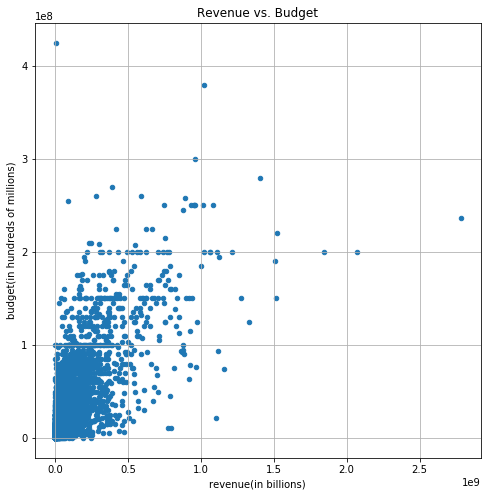

In [20]:
plt.figure(figsize=(10,10))
df_rev_bud.plot(kind = 'scatter', x='revenue', y='budget', figsize=(8,8), grid=1)
plt.xlabel('revenue(in billions)')
plt.ylabel('budget(in hundreds of millions)')
plt.title('Revenue vs. Budget')

There appears to be a positive correlation between the budget of a movie and its revenue.  There also appears to be outliers where there are movies that have high budgets but low revenues and low budgets but high revenues.

### Research Question 4. What genres have the highest and lowest average rating?

In [21]:
df_gr = df[['genres','vote_average']]
df_gr.head(2)

,genres,vote_average
0,Action|Adventure|Science Fiction|Thriller,6.5
1,Action|Adventure|Science Fiction|Thriller,7.1


Only the relevant columns have been selected relevant to the question.

In [22]:
df_gr.dropna(inplace = True)
df_gr.shape

C:\Users\gjg24\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(10842, 2)

There were NULL values in the genres column that were dropped.

In [23]:
from itertools import chain

#returns list from series of separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))

#calculate lengths of splits
lens = df_gr['genres'].str.split('|').map(len)

#create new dataframe where separated strings are in separate rows with appropriate rating
df_gr1 = pd.DataFrame({'genres' : chainer(df_gr['genres']),
                      'vote_average' : np.repeat(df_gr['vote_average'], lens)})

I separated the strings that were in each cell in the 'genre' column and put each individual genre matched up with its appropriate rating.

In [24]:
df_gr1.rename(columns = {'genres' : 'genre', 'vote_average' : 'rating'}, inplace=True)
df_gr1.head(1)

,genre,rating
0,Action,6.5


Renamed the columns for aesthetic purposes.

In [25]:
avg_rating = df_gr1.groupby('genre').mean().rating.sort_values(ascending=False)
avg_rating

genre
Documentary        6.908462
Music              6.480392
History            6.410479
Animation          6.403147
War                6.297778
Drama              6.165546
Crime              6.124889
Western            6.083030
Romance            6.042874
Family             5.997563
Foreign            5.981383
Mystery            5.946790
Adventure          5.940585
Comedy             5.905167
Fantasy            5.863537
TV Movie           5.788024
Action             5.787752
Thriller           5.750671
Science Fiction    5.665582
Horror             5.337447
Name: rating, dtype: float64

Grouped by the genre and then took the mean of the rating.  The results are now ready to plot.

Text(0.5,1,'Average Rating by Genre')

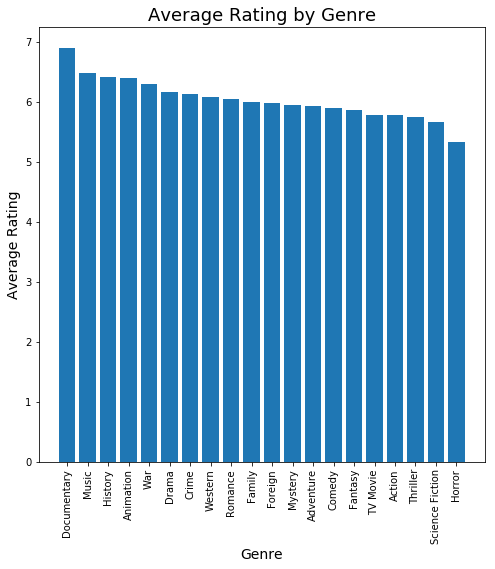

In [26]:
plt.figure(figsize=(8,8))
plt.bar(avg_rating.index, avg_rating)
plt.xticks(rotation='vertical')
plt.xlabel('Genre', fontsize = 14)
plt.ylabel('Average Rating', fontsize = 14)
plt.title('Average Rating by Genre', fontsize = 18)

It appears documentaries are the highest rated movies on average.  On the other hand, horror movies are significantly rated lower than any other genre.

### Research Question 5. What directors have the highest average rating of movies?

In [27]:
df3 = df[['director', 'vote_average']]
df3.rename(columns = {'vote_average' : 'rating'}, inplace=True)
df3.head(1)

C:\Users\gjg24\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,director,rating
0,Colin Trevorrow,6.5


I created a new dataframe with just the relevant columns and also changed the column name to rating.

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 2 columns):
director    10821 non-null object
rating      10865 non-null float64
dtypes: float64(1), object(1)
memory usage: 254.6+ KB


There are some NULL values in the director column so for the purposes of this question I will drop those rows.

In [29]:
df3.dropna(inplace=True)
df3.isnull().sum()

C:\Users\gjg24\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


director    0
rating      0
dtype: int64

In [30]:
df3.shape

(10821, 2)

There are no NULL values in either column.

In [31]:
from itertools import chain

#returns list from series of separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))

#calculate lengths of splits
lens = df3['director'].str.split('|').map(len)

#create new dataframe where separated strings are in separate rows with appropriate rating
df_dir = pd.DataFrame({'director' : chainer(df3['director']),
                      'rating' : np.repeat(df3['rating'], lens)})

In [32]:
df_dir.shape

(11891, 2)

There were 10,821 rows before splitting cells that had multiple directors and after splitting the cells we have 11,891 rows.  1,070 rows were created by splitting movies in multiple rows that had multiple directors.

In [33]:
df4 = df_dir.groupby('director').filter(lambda x : len(x)>=5)
df4.shape

(4689, 2)

I filtered out all directors that have less than 5 movies directed for purposes of answering the question.

In [34]:
df5 = df4.groupby('director').mean().rating.sort_values(ascending=False)[:20]
df5

director
Shannon Hartman                   7.566667
Christopher Nolan                 7.470000
Louis C.K.                        7.433333
Stanley Kubrick                   7.388889
Joss Whedon                       7.360000
David Fincher                     7.210000
Quentin Tarantino                 7.207143
Stephen Daldry                    7.200000
Wes Anderson                      7.200000
Spike Jonze                       7.160000
David Yates                       7.140000
Alfonso CuarÃ³n                   7.140000
Alejandro GonzÃ¡lez IÃ±Ã¡rritu    7.120000
Matthew Vaughn                    7.120000
Paul Thomas Anderson              7.037500
Brad Bird                         7.033333
Mike Thurmeier                    7.020000
J.J. Abrams                       7.020000
Tom Hooper                        7.016667
Nick Park                         7.000000
Name: rating, dtype: float64

These are directors who have directed at least 5 movies and have the highest average rating of every movie they have directed.  Shannon Hartman has the highest average rating of any of these directors.

### Research Question 6. On average, are movies rated higher over the last 20 years than before the last 20 years?

In [35]:
df_20 = df[['release_date', 'vote_average']]
print(df_20.release_date.max())
print(df_20.release_date.min())

2067-12-27 00:00:00
1968-01-01 00:00:00


It appears that the earliest released movie in our list is from January 1, 1968.  However, the latest released movie from our list is on December 27, 2067.  I will have to remove any movie that is listed as being released after this year.

In [36]:
df_20.shape

(10865, 2)

In [37]:
df_20.query('release_date <= "2018-12-31"', inplace=True)
df_20.shape

C:\Users\gjg24\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(10573, 2)

292 movies were removed from the query.

In [38]:
df_20.release_date.max()

Timestamp('2015-12-31 00:00:00')

This shows the date of the last movie released.

In [39]:
df_20a = df_20.query('release_date > "1995-12-31"')
df_20b = df_20.query('release_date <= "1995-12-31"')
print(df_20a.shape)
print(df_20b.shape)

(7997, 2)
(2576, 2)


I have separated the movies into 2 separate variables: (1) those movies that were released within 20 years of the last movie release in our list and (2) those movies released more than 20 years before the last movie that was released.

In [40]:
last20 = df_20a.vote_average.mean()
after20 = df_20b.vote_average.mean()
print(last20)
print(after20)

5.9185194447918175
6.118245341614912


Movies that were released from 1996 til now have an average rating of 5.92 while those released before 1996 have an average rating of 6.12.  Older movies have a higher average rating of approximately 0.19.

### Research Question 7. What is the average runtime of all movies? How has the average runtime for movies changed over the years?

In [41]:
df6 = df[['runtime', 'release_year']]
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 2 columns):
runtime         10865 non-null int64
release_year    10865 non-null int64
dtypes: int64(2)
memory usage: 254.6 KB


There are 10865 entires with no null values.

In [42]:
df6.runtime.min()

0

Since there are movies with runtime = 0, I will remove these movies from out data set.

In [43]:
df6.query('runtime != 0', inplace = True)
df6.runtime.mean()

C:\Users\gjg24\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


102.3638545320288

The average runtime for movies is approximately 102 minutes and 22 seconds.

Text(0.5,1,'Total Runtime of All Movies')

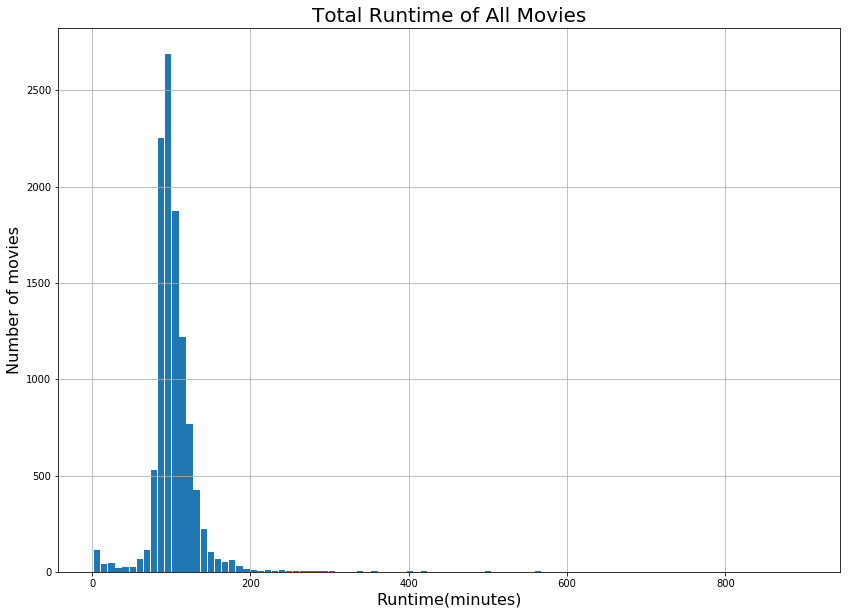

In [44]:
#histogram plot of runtime of movies
df6.runtime.plot(kind = 'hist', bins = 100, figsize = (14,10), rwidth = 0.9, grid = 1)
plt.xlabel('Runtime(minutes)', fontsize = 16)
plt.ylabel('Number of movies', fontsize = 16)
plt.title('Total Runtime of All Movies', fontsize = 20)

Almost all of the movies fall between 2 and 300 minutes. I would like to get a better idea of the distribution so I will cut off the outliers and plot a histogram of those movies that are shorter than 300 minutes.

Text(0.5,1,'Total Runtime of All Movies')

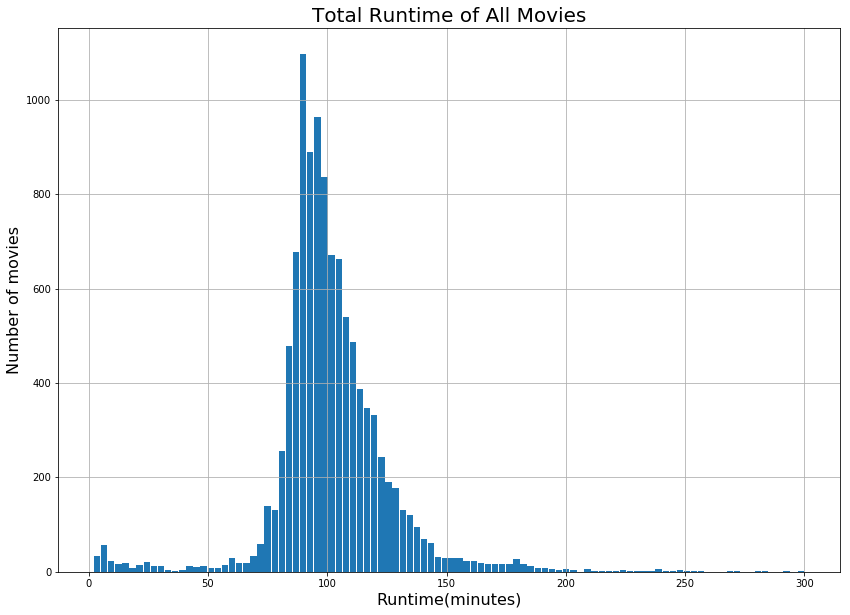

In [45]:
df6a = df6.query('runtime <= 300')
df6a.runtime.plot(kind = 'hist', bins = 100, figsize = (14,10), rwidth = 0.9, grid = 1)
plt.xlabel('Runtime(minutes)', fontsize = 16)
plt.ylabel('Number of movies', fontsize = 16)
plt.title('Total Runtime of All Movies', fontsize = 20)

The distribution is much easier to read. It appears to be skewed a little to the right with the majority of movies, more than 1,000, running around 80 to 100 minutes. I would like to further analyze the runtime of movies with additional plots while excluding some of the outliers.

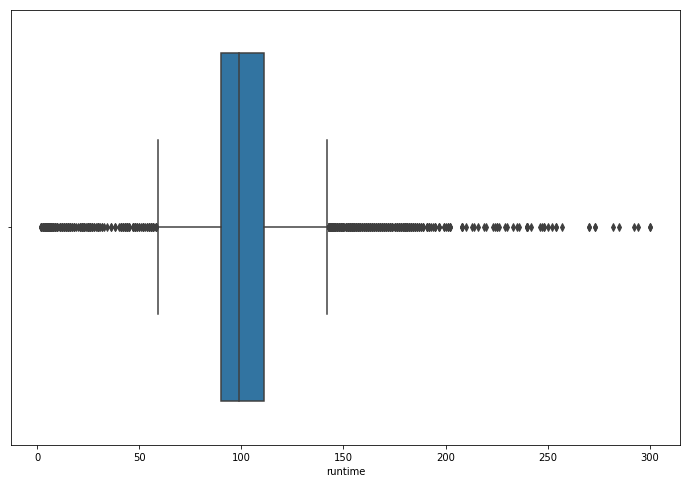

In [46]:
#plot boxplot
plt.figure(figsize=(12,8))
sns.boxplot(df6a['runtime'])

In [47]:
df6.describe()

,runtime,release_year
count,10834.000000,10834.000000
mean,102.363855,2001.295274
std,30.948225,12.819708
min,2.000000,1960.000000
25%,90.000000,1995.000000
50%,99.000000,2006.000000
75%,112.000000,2011.000000
max,900.000000,2015.000000


The plots give us an idea of how movie runtimes are distributed.  25% of the movies have a runtime of less than 90 minutes and 25% of the movies have a runtime of more than 112 minutes.

In [48]:
#find the average runtime of movies per year
run_year = df6.groupby('release_year').mean().runtime
run_year.head(5)

release_year
1960    110.656250
1961    119.419355
1962    124.343750
1963    111.323529
1964    109.214286
Name: runtime, dtype: float64

Text(0.5,1,'Average Runtime by Year')

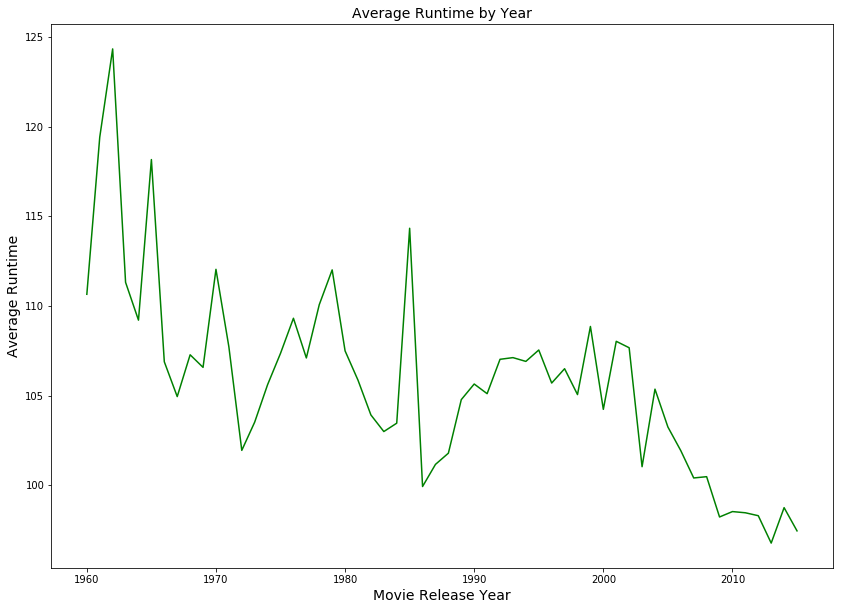

In [49]:
run_year.plot(kind = 'line', figsize = (14,10), color = 'green')
plt.xlabel('Movie Release Year', fontsize = 14)
plt.ylabel('Average Runtime', fontsize = 14)
plt.title('Average Runtime by Year', fontsize = 14)

This graph concludes that there is a gradual decline in movies' average run time with ocassional spikes in certain years.

### Research Question 8. What is the average runtime for the highest rated movies?  How do they compare with other movies that were rated lower?

In [50]:
df2 = df[['runtime','vote_average']]
df2.rename(columns={'vote_average' : 'rating'}, inplace=True)
df2.head(1)

C:\Users\gjg24\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,runtime,rating
0,124,6.5


I limited the dataframe to just the relevant columns and rennamed vote_average to rating.

In [51]:
df2.describe()

,runtime,rating
count,10865.000000,10865.000000
mean,102.071790,5.975012
std,31.382701,0.935138
min,0.000000,1.500000
25%,90.000000,5.400000
50%,99.000000,6.000000
75%,111.000000,6.600000
max,900.000000,9.200000


I will take the top 25% rated movies and use those as the top rated movies for purposes of this question. In addition, I will place movies in bins and graph them to compare movies' runtime and average ratings.

In [52]:
#create bins
bin_edges = [1.5, 5.4, 6.0, 6.6, 9.2]   
bin_names = ['shortest', 'medium', 'mod high', 'highest']
df2['rating_level'] = pd.cut(df2['rating'], bin_edges, labels = bin_names)

#average runtime for each bin
avg_run = df2.groupby('rating_level').mean().runtime

C:\Users\gjg24\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [53]:
avg_run

rating_level
shortest     95.380672
medium      100.992484
mod high    105.162587
highest     107.414663
Name: runtime, dtype: float64

It appears that the longer the movie, the higher the rating.  The average duration of the highest rated movies is  107 minutes and 25 seconds.

Text(0.5,1,'Average Rating and Average Runtime')

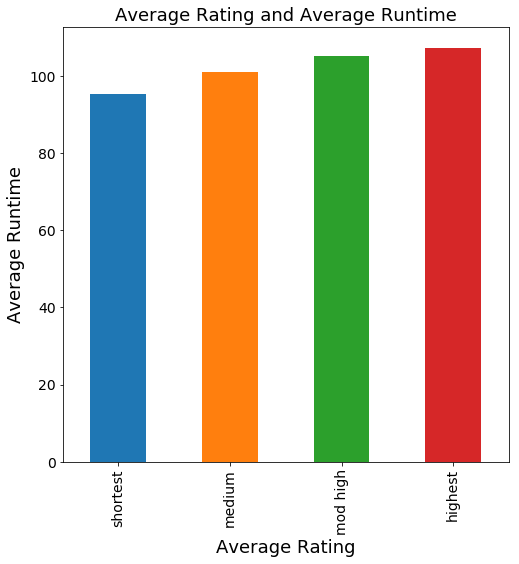

In [54]:
avg_run.plot(kind = 'bar', figsize=(8,8), fontsize = 14)
plt.xlabel('Average Rating', fontsize = 18)
plt.ylabel('Average Runtime', fontsize = 18)
plt.title('Average Rating and Average Runtime', fontsize = 18)

The longer the movie runtime, the higher the average rating.

### Research Question 9. What is the average runtime for the most profitable movies?  How do they compare with other movies that were less profitable?

In [55]:
df_duration = df[['runtime','budget','revenue']]
df_duration = df_duration[(df_duration['budget'] > 0) & (df_duration['revenue'] > 0)]

I limited the columns to those that are relevant.  I also removed any movies that had zero as their values for either their budget or revenue.

In [56]:
profit = df_duration['revenue'] - df_duration['budget']
df_duration['profit'] = profit
df_duration.drop(['budget','revenue'], axis=1, inplace=True)

I found the profit by subtracting each movies' budget from their revenue.  I then added a new column to the dataframe named 'profit' with those respective values.  Finally, I dropped the budget and revenue columns since they are no longer needed because we already used them to find the profit.

In [57]:
df_duration.describe()

,runtime,profit
count,3854.000000,3.854000e+03
mean,109.220291,7.048292e+07
std,19.922820,1.506195e+08
min,15.000000,-4.139124e+08
25%,95.000000,-1.321535e+06
50%,106.000000,2.002019e+07
75%,119.000000,8.170331e+07
max,338.000000,2.544506e+09


I will take the top 25% grossing movies and use those as the top grossing movies for purposes of this question.  In addition, I will place movies in bins and graph them to compare movies' runtime and their profits.

In [58]:
df_top = df_duration.query('profit >= 8.170331e+07')
df_top.mean().runtime

115.21473029045643

115 minutes and 13 seconds is the average runtime of the top 25% grossing movies.


In [59]:
#create bins
bin_edges = [-4.139124e+08, -1.321535e+06, 2.002019e+07, 8.170331e+07, 2.544506e+09]   
bin_names = ['0-25%', '25%-50%', '50%-75%', 'top 25%']
df_duration['profit_level'] = pd.cut(df_duration['profit'], bin_edges, labels = bin_names)

#average runtime for each bin
average_runtime = df_duration.groupby('profit_level').mean().runtime
average_runtime

profit_level
0-25%      107.428868
25%-50%    104.896158
50%-75%    109.344756
top 25%    115.214730
Name: runtime, dtype: float64

The top 25% grossing movies are usually longer than the less profitable movies, however, the least profitable movies are still a little longer than those that do a little better in the box office.

Text(0.5,1,'Movie Profit and Average Runtime')

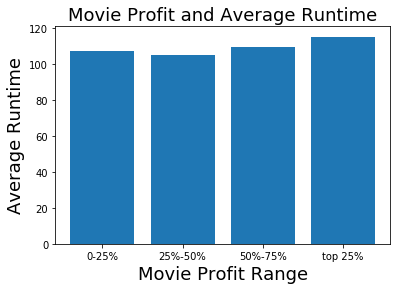

In [60]:
plt.bar(average_runtime.index, average_runtime)
plt.xlabel('Movie Profit Range', fontsize = 18)
plt.ylabel('Average Runtime', fontsize = 18)
plt.title('Movie Profit and Average Runtime', fontsize = 18)

As you can see, the top 25% grossing movies have a longer average runtime than movies that have profited less.

<a id='conclusions'></a>
## Conclusions

> There are a number of interesting conclusions established as a result of our analysis.  First of all, we have found that on average, documentaries are rated the highest and horror movies are rated the lowest.  Also, the longer the duration of the movie, the higher the average rating and the higher the profit the movie will most likely make.  There has been a gradual decline in the average runtime of movies.  The average runtime in movies was higher from the 1960s thru 2000.  Additionally, older movies have a higher rating than newer ones.  Specifically, movies released before 1996 have a .19 higher average rating than those released in 1996 and later.  Shannon Hartman is a director that has the highest average rating of movies of those directors that are credited for directing at least 5 movies.  Finally, Avatar has the highest revenue and Warrior's Way has the highest budget.  There is a positive correlation between budget and revenue.  The higher the budget, the higher the revenue of the movies.  However, there are a number of outliers that had a high budget and a low revenue or a low budget and a high revenue.  There are some limitations with the data.  There were occasions where rows with NULL values or values equaling zero had to be dropped therefore effecting the outcome of the analysis.  Furthermore, there seems to be a lot more movie data for movies released over the last 20 years than those previously released.  I am not sure if that is because there are a lot more movies released recently or if our database is incomplete.  